### Import package


In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### HyperParameters


In [8]:
input_size = 784  # 84x84
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MNIST


torch.Size([100, 1, 28, 28]) torch.Size([100])


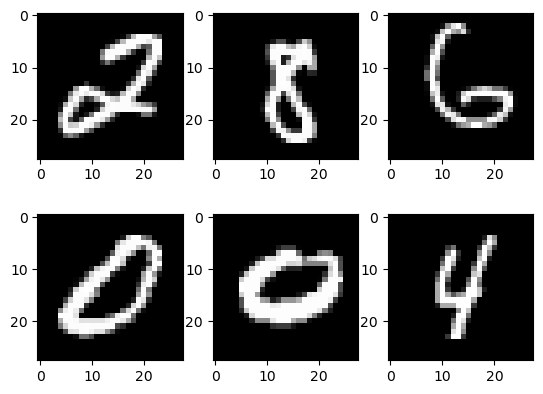

In [9]:
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=True)

examples = iter(train_loader)
samples, labels = examples.__next__()
print(samples.shape, labels.shape)
# 100 batch size, 1 channel, 28x28 image array

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [10]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)

        return out


model = NeuralNet(input_size, hidden_size, num_classes).to(device)

### Loss and optimizer


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Training loop


In [12]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(
                f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.4356
Epoch [1/2], Step [200/600], Loss: 0.3714
Epoch [1/2], Step [300/600], Loss: 0.3835
Epoch [1/2], Step [400/600], Loss: 0.2378
Epoch [1/2], Step [500/600], Loss: 0.2183
Epoch [1/2], Step [600/600], Loss: 0.2488
Epoch [2/2], Step [100/600], Loss: 0.1257
Epoch [2/2], Step [200/600], Loss: 0.1098
Epoch [2/2], Step [300/600], Loss: 0.1987
Epoch [2/2], Step [400/600], Loss: 0.2690
Epoch [2/2], Step [500/600], Loss: 0.1326
Epoch [2/2], Step [600/600], Loss: 0.1258


### Test


In [15]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 95.25 %
